In [2]:
#step 0
#do the necesary imports that you need while you create the code
import numpy as np
from IPython.display import YouTubeVideo, display
from skimage import io
import matplotlib.pyplot as plt
from itertools import combinations
import pandas as pd
import json
from pandas import json_normalize
%matplotlib inline

In [60]:
#step 1
#create 2 dataframes
#read SPY500_descarga.csv from data folder
df=pd.read_csv("data/SPY500_descarga.csv");df.head(5)

,Unnamed: 0,Date,SPY,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
0,0,2019-12-26,322.940002,85.449997,29.670000,159.270004,72.477501,89.830002,85.050003,171.009995,...,62.790001,98.680000,70.129997,56.529999,78.599998,101.790001,150.300003,254.419998,51.660000,133.029999
1,1,2019-12-27,322.859985,85.419998,28.440001,158.350006,72.449997,89.199997,84.910004,169.270004,...,63.119999,98.419998,69.889999,56.840000,78.839996,101.900002,150.009995,256.000000,51.500000,133.250000
2,2,2019-12-30,321.079987,84.900002,28.299999,159.119995,72.879997,88.519997,83.639999,167.289993,...,63.290001,97.680000,69.480003,56.400002,78.739998,100.639999,148.750000,254.110001,51.770000,132.210007
3,3,2019-12-31,321.859985,85.309998,28.680000,160.160004,73.412498,88.540001,85.019997,170.589996,...,63.490002,97.769997,69.779999,56.590000,78.790001,100.730003,149.679993,255.440002,51.919998,132.350006
4,4,2020-01-02,324.869995,85.949997,29.090000,159.410004,75.087502,89.550003,85.080002,168.809998,...,62.380001,101.650002,70.900002,56.930000,79.849998,102.169998,149.199997,259.140015,52.439999,134.139999


In [5]:
#read SPY500.csv
df_2=pd.read_csv("data/SPY500.csv"); df_2.head(5)


,stocks
0,SPY
1,A
2,AAL
3,AAP
4,AAPL


In [159]:
#step 2
#create a list for stocks in data from SPY500.csv
list_stocks = df_2['stocks'].to_list()
print(list_stocks)

['SPY', 'A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABMD', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK', 'ALL', 'ALLE', 'AMAT', 'AMCR', 'AMD', 'AME', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANET', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APD', 'APH', 'APTV', 'ARE', 'ATO', 'ATVI', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXP', 'AZO', 'BA', 'BAC', 'BAX', 'BBWI', 'BBY', 'BDX', 'BEN', 'BF.B', 'BIIB', 'BIO', 'BK', 'BKNG', 'BKR', 'BLK', 'BLL', 'BMY', 'BR', 'BRK.B', 'BRO', 'BSX', 'BWA', 'BXP', 'C', 'CAG', 'CAH', 'CARR', 'CAT', 'CB', 'CBOE', 'CBRE', 'CCI', 'CCL', 'CDAY', 'CDNS', 'CDW', 'CE', 'CERN', 'CF', 'CFG', 'CHD', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COO', 'COP', 'COST', 'CPB', 'CPRT', 'CRL', 'CRM', 'CSCO', 'CSX', 'CTAS', 'CTLT', 'CTRA', 'CTSH', 'CTVA', 'CTXS', 'CVS', 'CVX', 'CZR', 'D', 'DAL', 'DD', 'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DIS

# top 5 and bottom 5 list must look like this 
> ['SPY', 'A', 'AAL', 'AAP', 'AAPL'] **this is the top**.

> ['YUM', 'ZBH', 'ZBRA', 'ZION', 'ZTS'] **this is the tail**.


In [154]:
#step 3
#remove Unnamed: 0 column
df.drop([0])
#Sort index acending = False dataframe from SPY500_descarga
df_sorted= df.sort_index(ascending=False)
df_sorted[['Date', 'SPY', 'A', 'AAL', 'AAP']].head(10).round(decimals=2)

,Date,SPY,A,AAL,AAP
503,2021-12-23,470.60,157.80,18.26,232.13
502,2021-12-22,467.69,156.78,18.26,232.79
501,2021-12-21,463.06,153.96,18.12,229.57
500,2021-12-20,454.98,150.42,17.30,228.39
499,2021-12-17,459.87,151.42,16.95,232.82
498,2021-12-16,466.45,150.80,16.52,239.16
497,2021-12-15,470.60,154.31,16.99,239.14
496,2021-12-14,463.36,151.88,16.91,235.39
495,2021-12-13,466.57,156.29,17.12,234.12
494,2021-12-10,470.74,156.26,18.01,240.04


# Data must look like this

|     | Date       |    SPY |      A |   AAL |    AAP |
|----:|:-----------|-------:|-------:|------:|-------:|
| 503 | 2021-12-23 | 470.6  | 157.8  | 18.26 | 232.13 |
| 502 | 2021-12-22 | 467.69 | 156.78 | 18.26 | 232.79 |
| 501 | 2021-12-21 | 463.06 | 153.96 | 18.12 | 229.57 |
| 500 | 2021-12-20 | 454.98 | 150.42 | 17.3  | 228.39 |
| 499 | 2021-12-17 | 459.87 | 151.42 | 16.95 | 232.82 |
| 498 | 2021-12-16 | 466.45 | 150.8  | 16.52 | 239.16 |
| 497 | 2021-12-15 | 470.6  | 154.31 | 16.99 | 239.14 |
| 496 | 2021-12-14 | 463.36 | 151.88 | 16.91 | 235.39 |
| 495 | 2021-12-13 | 466.57 | 156.29 | 17.12 | 234.12 |
| 494 | 2021-12-10 | 470.74 | 156.26 | 18.01 | 240.04 |

In [40]:
#step 4
#obtain simple statistics of all dataframe
df_sorted[['Date', 'SPY', 'A', 'AAL', 'AAP']].describe().round(3)

,SPY,A,AAL,AAP
count,504.000,504.000,504.000,504.000
mean,372.235,117.861,17.890,169.713
std,60.067,30.096,5.141,36.120
min,222.950,63.370,9.040,75.030
25%,326.535,89.730,13.050,146.432
50%,370.120,117.390,17.990,158.395
75%,425.598,147.355,21.445,202.113
max,470.740,179.280,30.470,241.910


|       |      SPY |        A |       AAL |     AAP |
|:------|---------:|---------:|----------:|--------:|
| count | 504      | 504      | 504       | 504     |
| mean  | 372.235  | 117.861  |  17.8903  | 169.713 |
| std   |  60.0669 |  30.0959 |   5.14066 |  36.12  |
| min   | 222.95   |  63.37   |   9.04    |  75.03  |
| 25%   | 326.535  |  89.73   |  13.05    | 146.432 |
| 50%   | 370.12   | 117.39   |  17.99    | 158.395 |
| 75%   | 425.598  | 147.355  |  21.445   | 202.113 |
| max   | 470.74   | 179.28   |  30.47    | 241.91  |

In [49]:
#step 5
#Set Date column as index
df_sorted[['Date', 'SPY', 'A', 'AAL', 'AAP', 'AAPL']].set_index('Date').round(decimals=2).head(10)

,SPY,A,AAL,AAP,AAPL
Date,,,,,
2021-12-23,470.60,157.80,18.26,232.13,176.28
2021-12-22,467.69,156.78,18.26,232.79,175.64
2021-12-21,463.06,153.96,18.12,229.57,172.99
2021-12-20,454.98,150.42,17.30,228.39,169.75
2021-12-17,459.87,151.42,16.95,232.82,171.14
2021-12-16,466.45,150.80,16.52,239.16,172.26
2021-12-15,470.60,154.31,16.99,239.14,179.30
2021-12-14,463.36,151.88,16.91,235.39,174.33
2021-12-13,466.57,156.29,17.12,234.12,175.74


| Date       |    SPY |      A |   AAL |    AAP |   AAPL |
|:-----------|-------:|-------:|------:|-------:|-------:|
| 2021-12-23 | 470.6  | 157.8  | 18.26 | 232.13 | 176.28 |
| 2021-12-22 | 467.69 | 156.78 | 18.26 | 232.79 | 175.64 |
| 2021-12-21 | 463.06 | 153.96 | 18.12 | 229.57 | 172.99 |
| 2021-12-20 | 454.98 | 150.42 | 17.3  | 228.39 | 169.75 |
| 2021-12-17 | 459.87 | 151.42 | 16.95 | 232.82 | 171.14 |
| 2021-12-16 | 466.45 | 150.8  | 16.52 | 239.16 | 172.26 |
| 2021-12-15 | 470.6  | 154.31 | 16.99 | 239.14 | 179.3  |
| 2021-12-14 | 463.36 | 151.88 | 16.91 | 235.39 | 174.33 |
| 2021-12-13 | 466.57 | 156.29 | 17.12 | 234.12 | 175.74 |
| 2021-12-10 | 470.74 | 156.26 | 18.01 | 240.04 | 179.45 |

In [58]:
#step 6
#Create a diccionary  with name random_dic  like this {number : column, number: column ,....}
random_dic = {i : list_stocks[i] for i in range(0,len(list_stocks))}
print(random_dic)
#hint ---some SPY500 data is missing because some stocks does not have 2 year period or i coulndt download because API Fails 
#        or they are delisted from the market

{0: 'SPY', 1: 'A', 2: 'AAL', 3: 'AAP', 4: 'AAPL', 5: 'ABBV', 6: 'ABC', 7: 'ABMD', 8: 'ABT', 9: 'ACN', 10: 'ADBE', 11: 'ADI', 12: 'ADM', 13: 'ADP', 14: 'ADSK', 15: 'AEE', 16: 'AEP', 17: 'AES', 18: 'AFL', 19: 'AIG', 20: 'AIZ', 21: 'AJG', 22: 'AKAM', 23: 'ALB', 24: 'ALGN', 25: 'ALK', 26: 'ALL', 27: 'ALLE', 28: 'AMAT', 29: 'AMCR', 30: 'AMD', 31: 'AME', 32: 'AMGN', 33: 'AMP', 34: 'AMT', 35: 'AMZN', 36: 'ANET', 37: 'ANSS', 38: 'ANTM', 39: 'AON', 40: 'AOS', 41: 'APA', 42: 'APD', 43: 'APH', 44: 'APTV', 45: 'ARE', 46: 'ATO', 47: 'ATVI', 48: 'AVB', 49: 'AVGO', 50: 'AVY', 51: 'AWK', 52: 'AXP', 53: 'AZO', 54: 'BA', 55: 'BAC', 56: 'BAX', 57: 'BBWI', 58: 'BBY', 59: 'BDX', 60: 'BEN', 61: 'BF.B', 62: 'BIIB', 63: 'BIO', 64: 'BK', 65: 'BKNG', 66: 'BKR', 67: 'BLK', 68: 'BLL', 69: 'BMY', 70: 'BR', 71: 'BRK.B', 72: 'BRO', 73: 'BSX', 74: 'BWA', 75: 'BXP', 76: 'C', 77: 'CAG', 78: 'CAH', 79: 'CARR', 80: 'CAT', 81: 'CB', 82: 'CBOE', 83: 'CBRE', 84: 'CCI', 85: 'CCL', 86: 'CDAY', 87: 'CDNS', 88: 'CDW', 89: 'CE',

# dictionary must look like this
{0: 'SPY', 1: 'A', 2: 'AAL', 3: 'AAP', 4: 'AAPL', 5: 'ABBV', 6: 'ABC',....}

In [67]:
#step 7

#Manage missing data of your dataframe in the way you want

df_new = df_sorted.isnull().sum(axis=0).sort_values(ascending=False)
df_new


#hint ---- Remember to update your list from step 2.
#hint ---- Some companies of stocks actualy have less than 2 years of data because they have less than 2 year of existance in the market
#          if you make a mean of the data you will be manipulating the numbers and its a investment descition
#          arround 1 billion dollars will be managed by this analysis so think the analysis only works well with arround 2 years of data.
#          if you make a mistake people may will lose their job and their life savings.
#          take a decisiton and explain why you take it.


OGN     348
CARR     57
OTIS     57
KSU       7
Date      0
       ... 
EQR       0
EQIX      0
EOG       0
ENPH      0
ZTS       0
Length: 505, dtype: int64

In [9]:
#step 8
#Explain your decisition of how you managed the missing data

#There are only 4 stocks with no data (OGN, CARR, OTIS and KSU).
#I will delete the stock OGN beacuse we have less that a year data, so is not representative for the analysis.
#In case of KSU it seems like nowadays is not anymore in the SP500, so I will also delete this stock from the dataframe.
#Finally, in case of CARR and OTIS, as we have enough data for the analysis, I will delete only the empty rows (less than 3 moths). I will still have around 2 years of data for all the stocks.

In [141]:
#New data frame updated
df_sorted_new = df_sorted.sort_index(ascending=True)
df_sorted_new = df_sorted_new.drop(range(0,57), axis=0)
df_sorted_new = df_sorted_new.drop(['OGN','KSU'], axis =1)
df_sorted_new

,Date,SPY,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
57,2020-03-19,240.509995,65.760002,10.290000,85.970001,61.195000,71.059998,86.000000,140.509995,74.500000,...,57.990002,75.459999,34.430000,35.110001,64.459999,62.599998,89.139999,185.070007,27.250000,102.330002
58,2020-03-20,228.800003,66.459999,10.380000,75.029999,57.310001,68.820000,80.610001,130.509995,68.000000,...,50.630001,71.860001,32.740002,32.820000,59.889999,58.080002,85.980003,179.380005,25.580000,100.940002
59,2020-03-23,222.949997,63.369999,10.250000,78.500000,56.092499,64.500000,73.930000,132.339996,62.820000,...,50.000000,72.000000,31.450001,31.900000,56.639999,56.520000,80.809998,170.720001,24.080000,92.660004
60,2020-03-24,243.149994,67.000000,13.920000,86.379997,61.720001,67.489998,79.849998,143.669998,69.690002,...,54.049999,76.910004,35.439999,33.810001,62.000000,69.660004,93.400002,180.550003,25.180000,103.760002
61,2020-03-25,246.789993,69.000000,15.390000,90.370003,61.380001,67.910004,75.349998,146.889999,70.750000,...,55.549999,75.019997,37.290001,35.000000,63.860001,72.870003,96.830002,186.229996,25.850000,108.209999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,2021-12-17,459.869995,151.419998,16.950001,232.820007,171.139999,129.529999,125.180000,315.549988,137.110001,...,67.000000,200.139999,60.029999,53.410000,115.809998,131.929993,120.849998,588.520020,61.200001,234.309998
500,2021-12-20,454.980011,150.419998,17.299999,228.389999,169.750000,130.860001,126.010002,316.230011,134.979996,...,67.120003,196.149994,59.160000,52.590000,114.050003,131.570007,118.889999,570.780029,59.400002,234.259995
501,2021-12-21,463.059998,153.960007,18.120001,229.570007,172.990005,129.949997,127.610001,332.200012,135.270004,...,66.339996,206.429993,60.500000,52.970001,115.980003,133.369995,122.459999,580.210022,61.650002,237.639999
502,2021-12-22,467.690002,156.779999,18.260000,232.789993,175.639999,132.050003,127.809998,343.399994,138.990005,...,66.730003,215.000000,60.990002,54.389999,116.160004,134.630005,124.730003,580.429993,61.860001,241.570007


In [162]:
#New list updated
list_stocks = [e for e in list_stocks if e not in ('OGN', 'KSU')]
    
print(list_stocks)

['SPY', 'A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABMD', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK', 'ALL', 'ALLE', 'AMAT', 'AMCR', 'AMD', 'AME', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANET', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APD', 'APH', 'APTV', 'ARE', 'ATO', 'ATVI', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXP', 'AZO', 'BA', 'BAC', 'BAX', 'BBWI', 'BBY', 'BDX', 'BEN', 'BF.B', 'BIIB', 'BIO', 'BK', 'BKNG', 'BKR', 'BLK', 'BLL', 'BMY', 'BR', 'BRK.B', 'BRO', 'BSX', 'BWA', 'BXP', 'C', 'CAG', 'CAH', 'CARR', 'CAT', 'CB', 'CBOE', 'CBRE', 'CCI', 'CCL', 'CDAY', 'CDNS', 'CDW', 'CE', 'CERN', 'CF', 'CFG', 'CHD', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COO', 'COP', 'COST', 'CPB', 'CPRT', 'CRL', 'CRM', 'CSCO', 'CSX', 'CTAS', 'CTLT', 'CTRA', 'CTSH', 'CTVA', 'CTXS', 'CVS', 'CVX', 'CZR', 'D', 'DAL', 'DD', 'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DIS

In [163]:
#step 9
#We are going to plot some data in orde to see if they have some logic that we can apply it, lets explore it
#Create a list or a function that get 9 random numbers with the max number as the  max lenght of your stock list updated.
#The first in the list must by the number corresponding to SPY allways
import random

random_number = [0] + [random.randrange(1,502) for i in range(8)]
random_number

[0, 294, 412, 366, 46, 33, 303, 118, 209]

In [165]:
random_stocks = [list_stocks[index] for index in random_number]
df_random = df_sorted_new[random_stocks]
df_random

,SPY,MAS,SNA,PGR,ATO,AMP,MHK,CTAS,GPS
57,240.509995,32.580002,107.029999,67.040001,98.510002,95.430000,66.379997,183.000000,8.070000
58,228.800003,29.469999,99.870003,68.279999,86.199997,89.830002,58.660000,175.089996,7.220000
59,222.949997,27.530001,95.570000,66.550003,80.500000,82.879997,63.330002,157.059998,6.280000
60,243.149994,31.620001,106.589996,69.040001,88.589996,100.059998,77.290001,173.800003,8.130000
61,246.789993,34.119999,109.940002,69.949997,90.300003,103.599998,82.370003,192.330002,8.980000
...,...,...,...,...,...,...,...,...,...
499,459.869995,66.470001,209.350006,100.970001,98.830002,294.630005,170.639999,438.510010,16.820000
500,454.980011,64.739998,204.509995,101.519997,99.330002,283.820007,163.949997,429.940002,16.690001
501,463.059998,66.379997,208.509995,101.220001,99.459999,294.500000,168.429993,436.790009,17.180000
502,467.690002,67.449997,208.179993,101.160004,102.120003,298.690002,169.250000,428.890015,17.190001


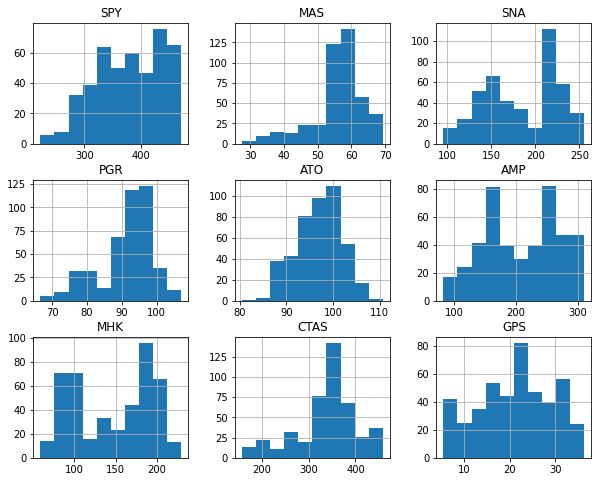

['SPY', 'MAS', 'SNA', 'PGR', 'ATO', 'AMP', 'MHK', 'CTAS', 'GPS']
[0, 294, 412, 366, 46, 33, 303, 118, 209]


In [166]:
#step 10
#Create a figure  3 columns and 3 rows and plot a histogram random stocks on it,
#each graph must have the name of the stock 
import matplotlib.pyplot as plt
%matplotlib inline

df_random.hist(layout = (3,3), figsize = (10,8), )
fig.tight_layout()
plt.show()


#print your list of the stocks
print(random_stocks)
print(random_number)
#hint --- you can use random from numpy and use the dictionary  and the function or list we have made to select the information 
#         from your dataframe
#hint --- SPY is an index of 500 stocks that means it has a partial number of percentage of each stock is in your data, its your brenchmark

# No Mater how much i run it it allways give 0 cause the first item in the list
[0, 479, 14, 404, 272, 94, 261, 316, 63]

[0, 446, 176, 419, 116, 278, 417, 459, 284]

[0, 239, 367, 403, 449, 274, 382, 335, 15]

[0, 373, 466, 321, 93, 185, 107, 422, 256]

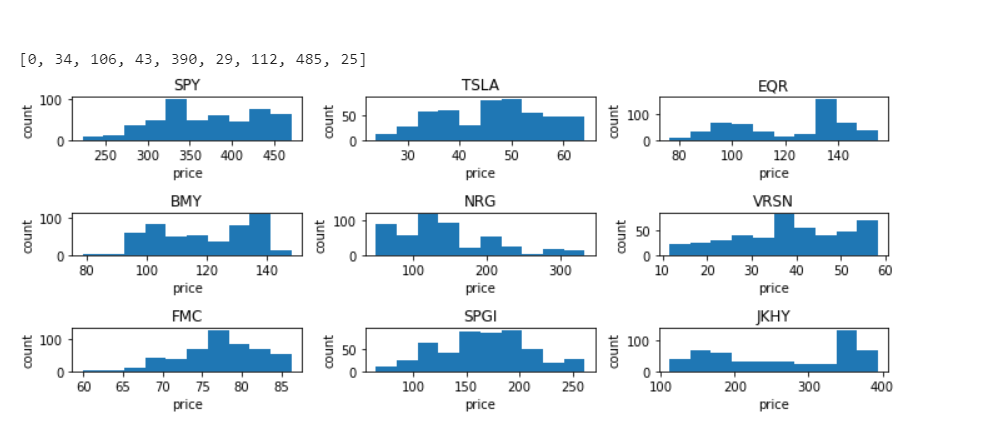

In [12]:
from IPython.display import Image
Image(filename='image.png')
#your output and graph must be something like this because its random except SPY stock at position 0,0

In [177]:
# Step 11
#save your Dataframe as Csv or picke las Cleaned_SPY500.csv or Cleaned_SPY500.pkl
df_random.to_csv('DF_SP500.csv')


In [14]:
# Step 12 answer some questions about the data


#1.-what does the data is telling you?
#Each stock has a different distribution, they don't follow any particular pattern.

#2.-the prices are close to the same range? why or why not?
#No, each stock has his own prices range.

#3.-how i can know if a specific stock is following or not the brenchmark?
#If the stock price is closed to the most repeted price in the histogram, we could say that it is following the benchmark

#4.-how i can compare 2 diferent stocks of diferent prices?
#If we calculate the median of each stock, we can compare the brenchmark of each stock.

In [173]:
# Step 13
# CREATE A DATAFRAME  with 10 stocks you pick as top stocks based in youe feelings and information you know or select it randomly
# first column your name, second column the ticker of the stock
my_portfolio = pd.DataFrame({'Name':['Marta','Marta','Marta','Marta','Marta','Marta','Marta','Marta','Marta','Marta'],'Ticker_of_stock':['FMC', 'GPS', 'CTAS', 'SBAC', 'SBUX', 'SCHW', 'SEE', 'SHW', 'SIVB', 'SJM']})
my_portfolio
#save it as my_portfolio.pkl or my_portfolio.csv

,Name,Ticker_of_stock
0,Marta,FMC
1,Marta,GPS
2,Marta,CTAS
3,Marta,SBAC
4,Marta,SBUX
5,Marta,SCHW
6,Marta,SEE
7,Marta,SHW
8,Marta,SIVB
9,Marta,SJM


In [174]:
my_portfolio.to_csv("my_portfolio.csv")